# Clustering Nodes in Graphs

In [30]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from importlib import reload
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import networkx as nx
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
import slideUtilities as sl
print('')

In [31]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

Today we'll return to the subject of clustering, but now we'll be looking at nodes of a graph.

Why might we want to cluster graph nodes?

* If graph nodes are our "data objects", then we might want to cluster them for all of the same reasons as we did for the case when data objects were simple records or tuples.
* Even for simple records, a distance matrix can be interpreted as a weighted graph.
* In social networks, we may want to identify communities.
* In the Web, we may want to find groups of related pages.

Outline:
    
1. k-core decomposition
2. Min s-t cut
3. Min cut
4. Spectral graph partitioning

## K-core Decomposition

The idea behind k-core decomposition is to find a subset of a graph that represents its "core."

These are considered to be well-connected nodes that form a subgraph.

The subgraph may or may not be connected, but usually it is.

To capture this ideal formally, we say that the __k-core__ of $G = (V,E)$ is a __subgraph__ $G_k$ of $G$ such that all nodes in $G_k$ have degree at least $k$.

The code number of a node $n$ is $c(n)$ if $n$ is contained in the $c(n)$ core but not in the $c(n) + 1$ core.

The set of all $k$-cores of a graph is its __$k$-core decomposition.__

In practice, there is a simple, intuitive way to compute the $k$ core decomposition of a graph.

Start with a graph $G$ whose maximum degree is $m$.

``
for n in range(1,m):
    remove all nodes of degree n
        repeat above step until node nodes of degree n are left
    all nodes removed form the n-core
    ``

In [56]:
G=nx.karate_club_graph()
G = nx.Graph(G)
np.random.seed(2)
pos = nx.spring_layout(G)
print('G has {} nodes and maximum degree {}'.format(len(G), max(nx.degree(G).values())))

G has 34 nodes and maximum degree 17


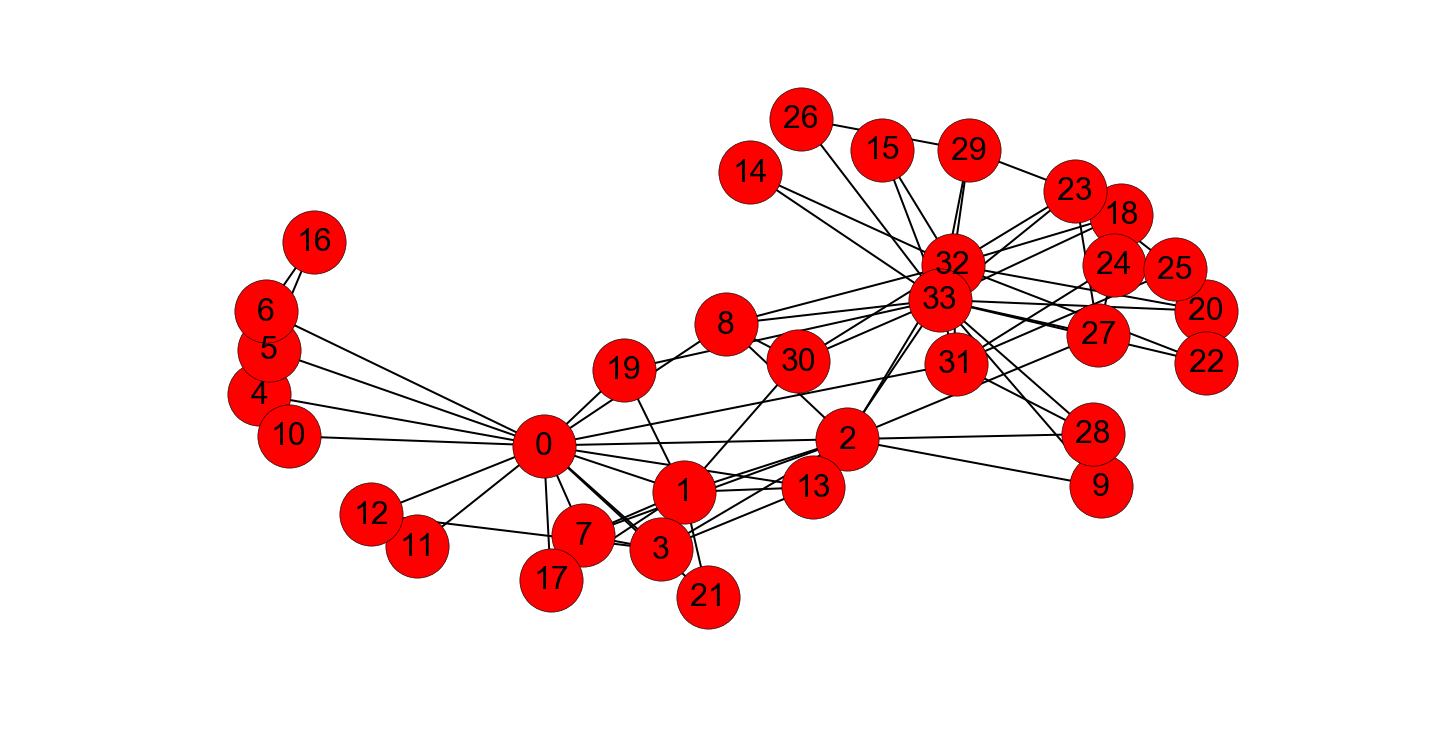

In [76]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(111)
nx.draw(G, pos=pos, with_labels=True, node_size=1000, font_size=16, ax=ax)

Let's compute its $k$-core decomposition.

In [43]:
core_dec = nx.core_number(G)
core_dec

{0: 4,
 1: 4,
 2: 4,
 3: 4,
 4: 3,
 5: 3,
 6: 3,
 7: 4,
 8: 4,
 9: 2,
 10: 3,
 11: 1,
 12: 2,
 13: 4,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 3,
 20: 2,
 21: 2,
 22: 2,
 23: 3,
 24: 3,
 25: 3,
 26: 2,
 27: 3,
 28: 3,
 29: 3,
 30: 4,
 31: 3,
 32: 4,
 33: 4}

Plotting the graph; nodes with the same color belong in the same core

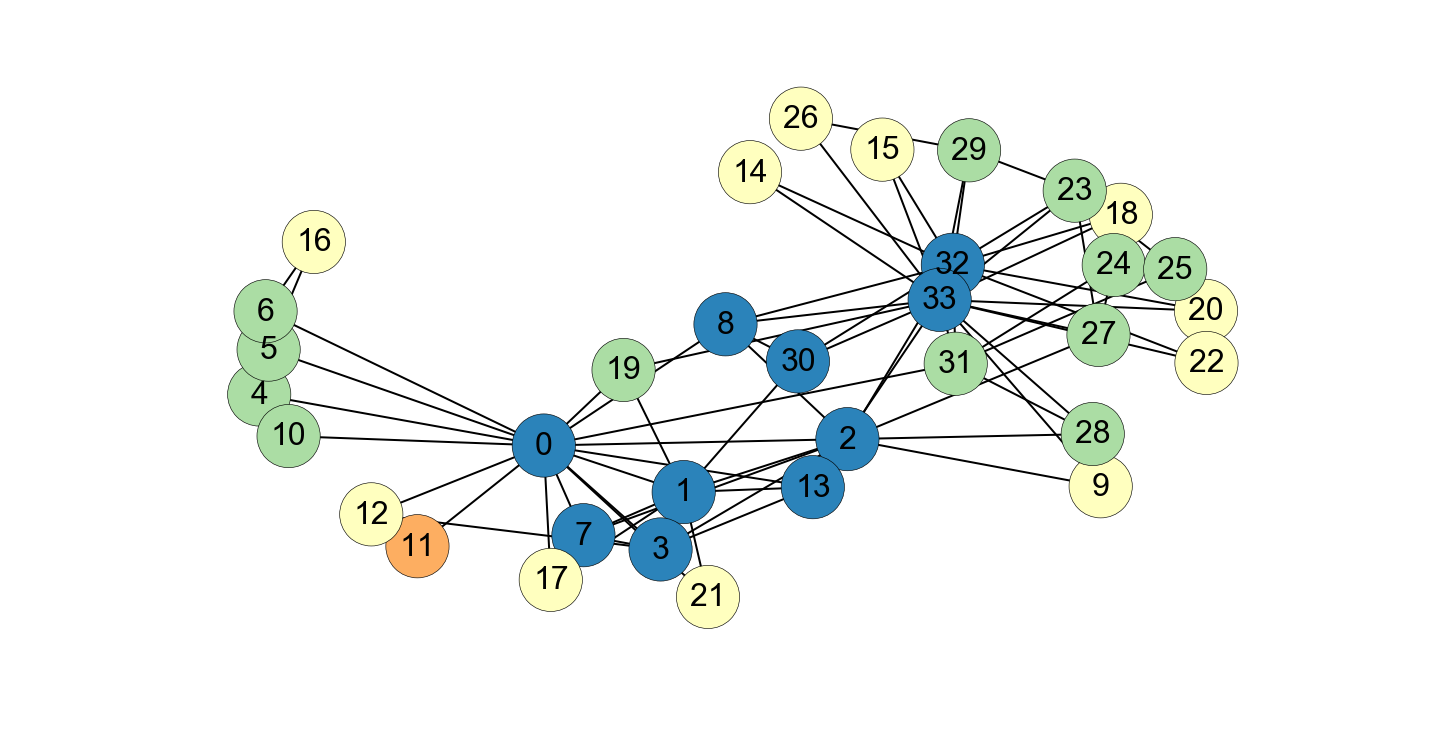

In [78]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(111)
colors = ['#d7191c', '#fdae61', '#ffffbf', '#abdda4', '#2b83ba']
node_colors = [ colors[core_dec[v]] for v in G.nodes()]
nx.draw(G, pos = pos, node_color=node_colors, with_labels=True, node_size=1000, font_size=16, ax=ax)


## Min $s$-$t$ cut

Let us say we have a graph $G$ and two nodes in mind, $s$ and $t$.  

We would like to isolate $s$ from $t$.  What is the cheapest way to do it?

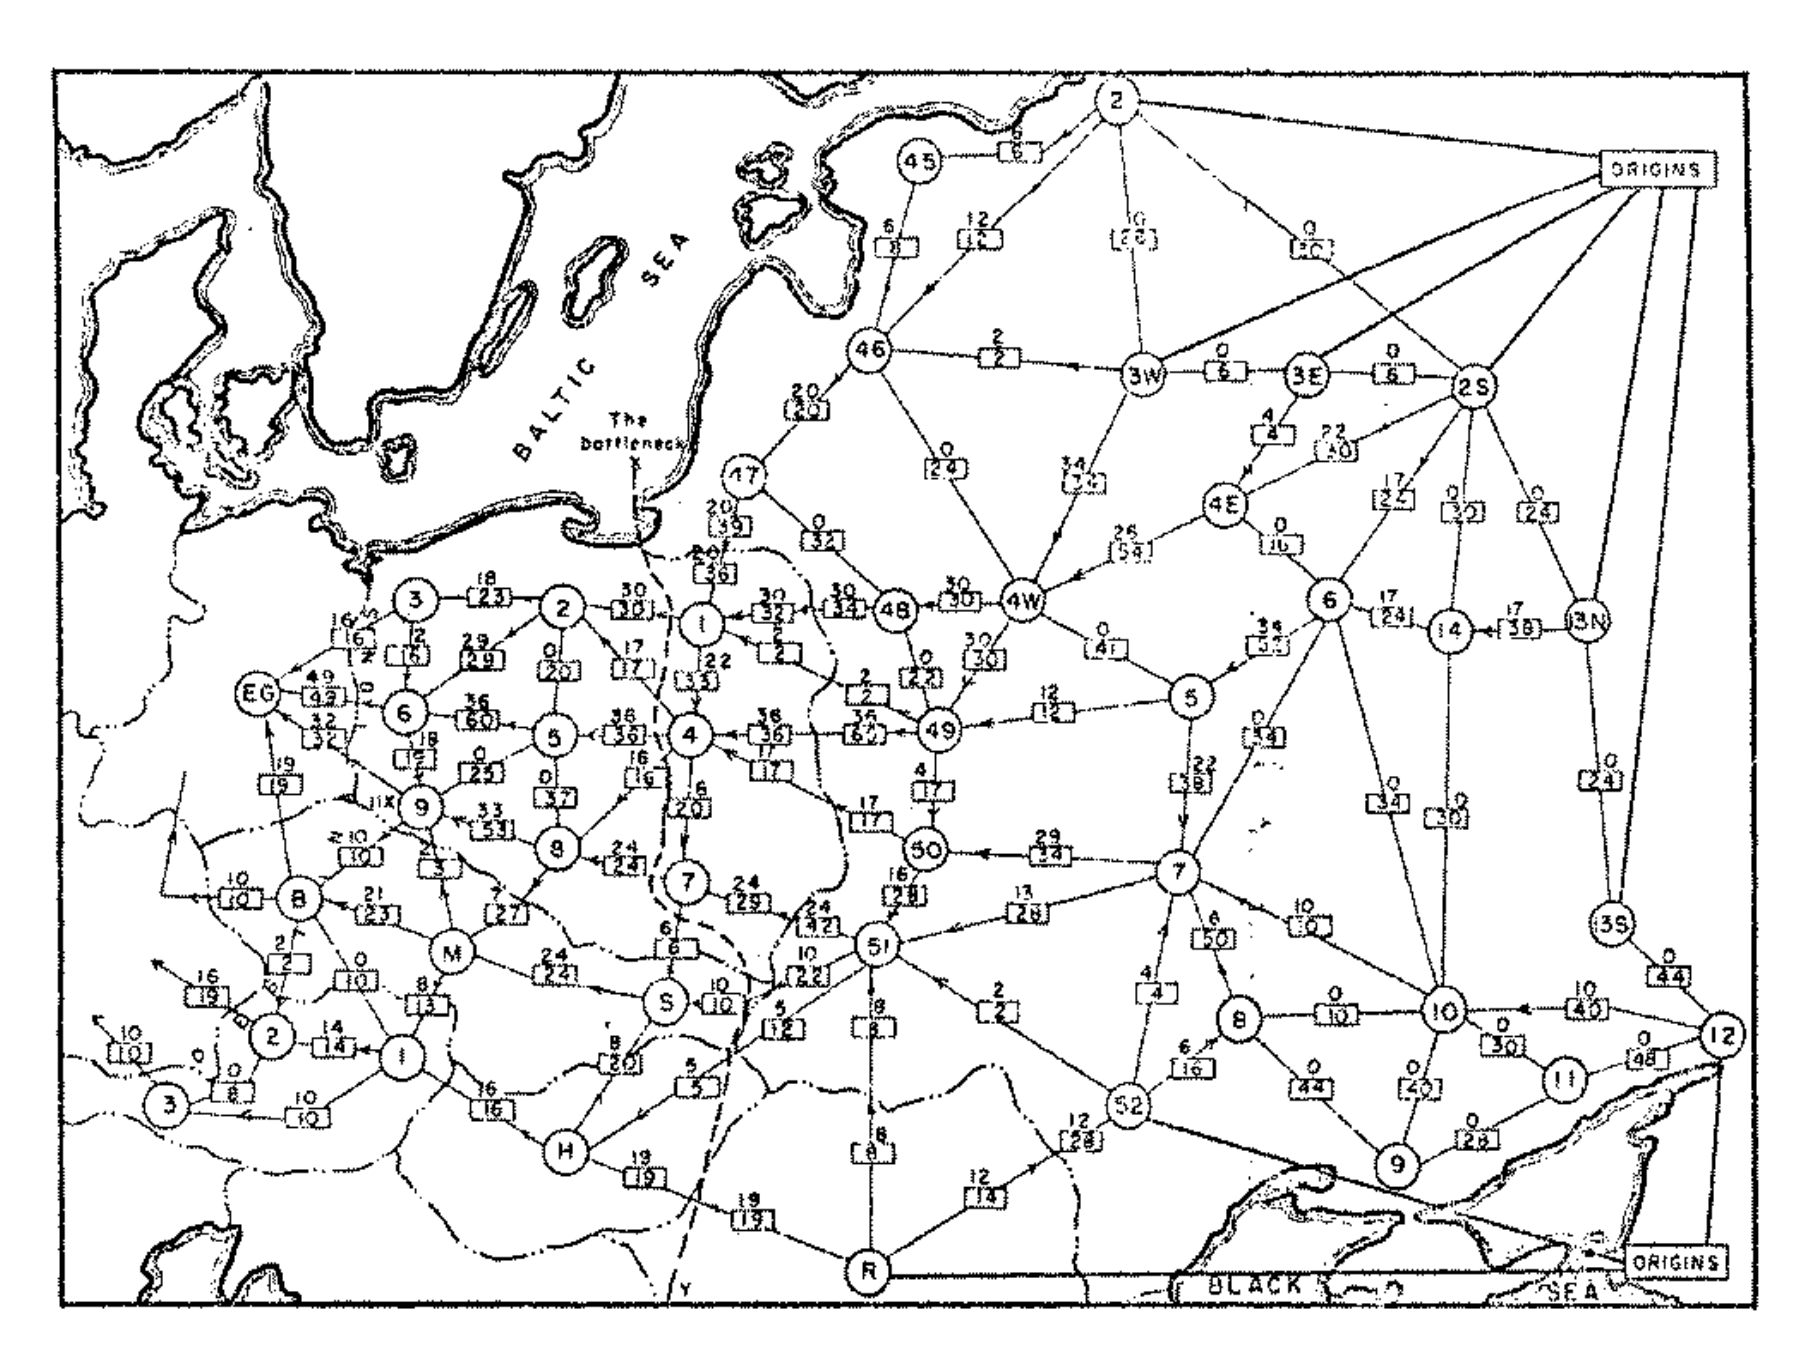

In [82]:
# Image credit: On the history of the transportation and maximum flow problems.
# Alexander Schrijver in Math Programming, 91: 3, 2002.
sl.hide_code_in_slideshow()
display(Image("figs/L23-max-flow-soviet-rail-1955.png", width=600))

A min $s$-$t$ cut problem is as follows.

We are given a weighted graph $G = (V,E)$.

An $s$-$t$ cut $C$ of $G$ is a partition of $V$ into $(U, V-U)$ such that $s \in U$ and $t \in V-U$.

The __cost__ of a cut is the total weight of the edges that go between the two parts:

$$ \text{Cost}(C) = \sum_{e(u,v), u\in U, v\in V-U} w(e)$$

This is a very famous problem that can be solved in time that is polynomial in $|V|$ and $|E|$. Increasingly better solutions have been found over the past 60+ years.  

Looking at the karate club, the two key members are numbers 0 and 33.

In [10]:
cut_edges = nx.minimum_edge_cut(G, s=0, t=33)
cut_edges

{(0, 8),
 (0, 31),
 (1, 30),
 (2, 8),
 (2, 27),
 (2, 28),
 (2, 32),
 (9, 33),
 (13, 33),
 (19, 33)}

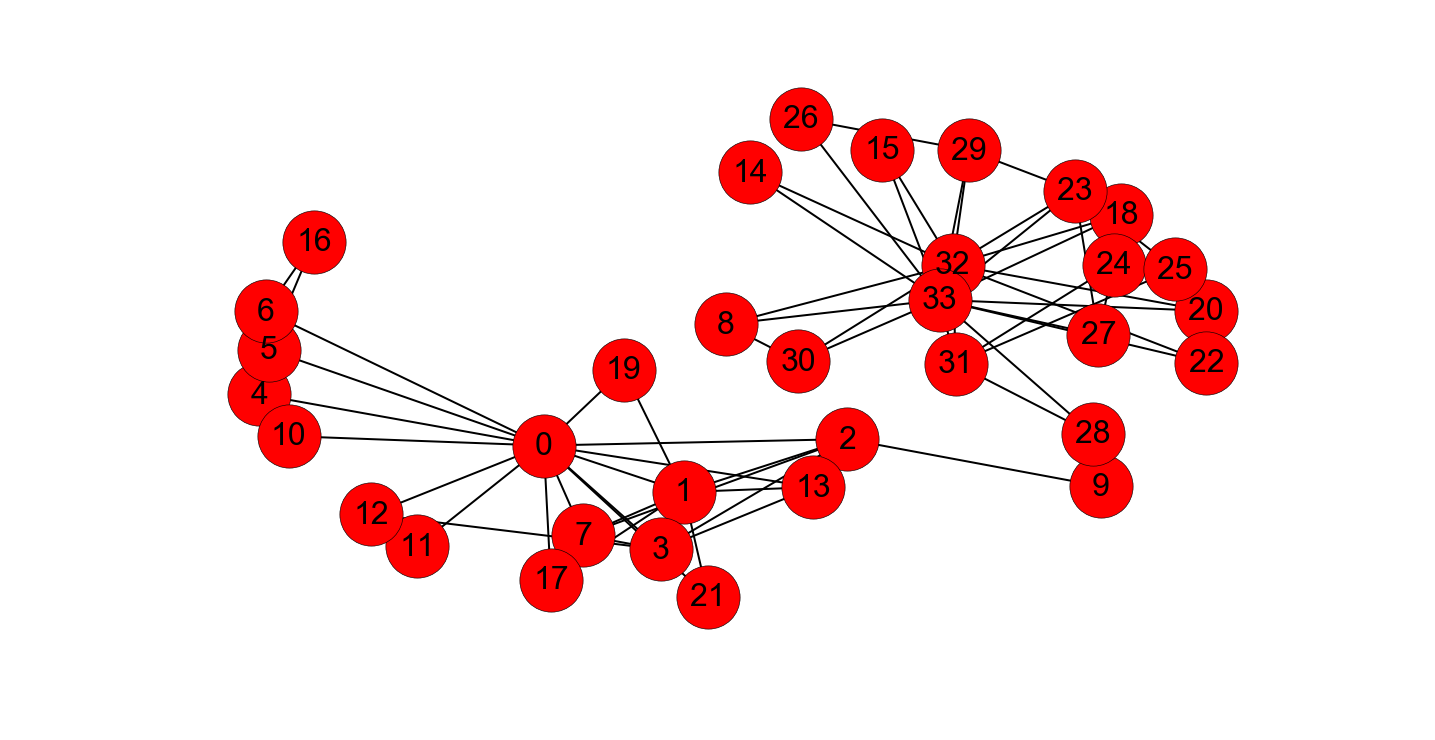

In [89]:
Gcopy = G.copy()
Gcopy.remove_edges_from(cut_edges)
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(111)
nx.draw(Gcopy,  pos=pos, with_labels='True', node_size=1000, font_size=16, ax=ax)

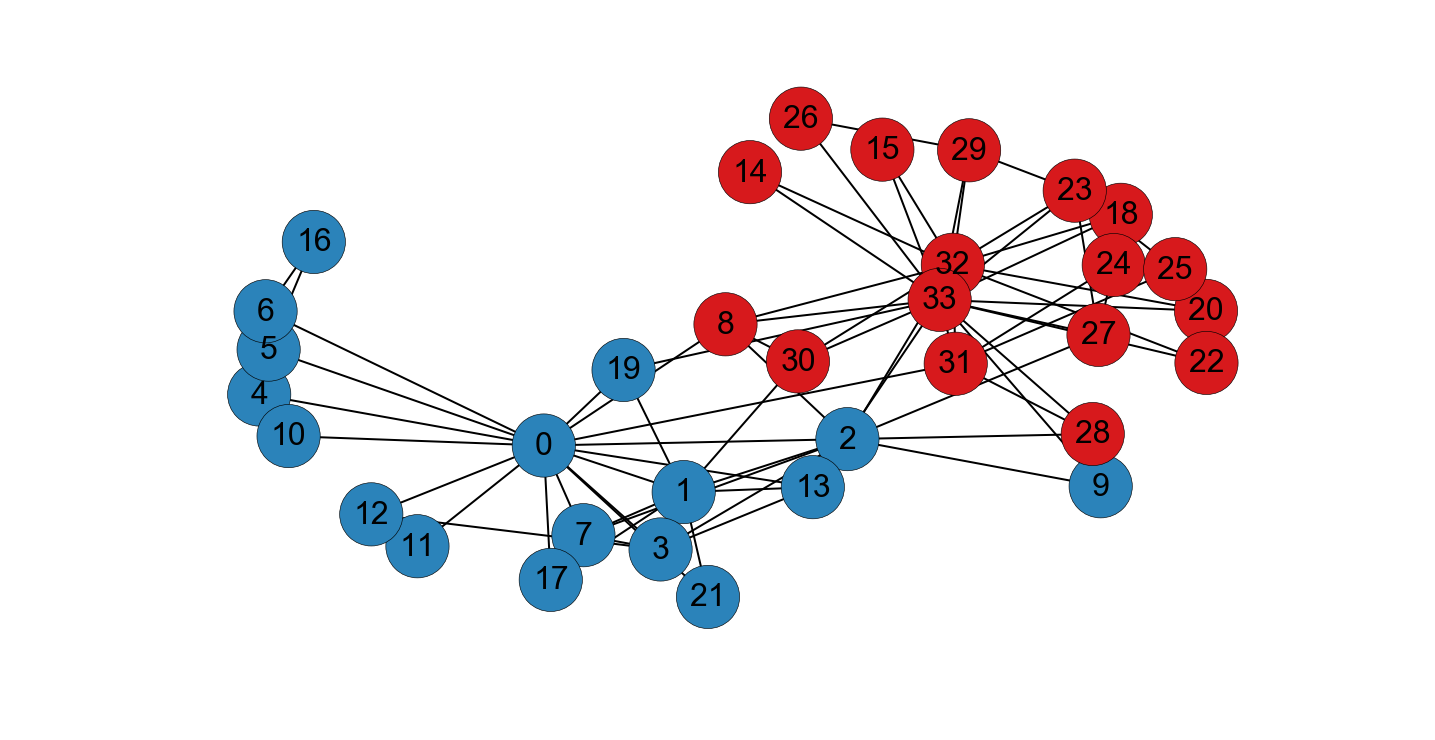

In [88]:
cc = nx.connected_components(Gcopy)
node_set = {node: i for i, s in enumerate(cc) for node in s}
colors = ['#d7191c', '#2b83ba']
node_colors = [ colors[node_set[v]-1] for v in G.nodes()]
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(111)
nx.draw(G, node_color=node_colors, pos=pos, with_labels='True', node_size=1000, font_size=16, ax=ax)

## Minimum Cuts

Now, in partitioning a graph, we may not have any particular $s$ and $t$ in mind.  

Rather, we may want to simply find the "cheapest" way to disconnect the graph.

Clearly, we can do this using $s$-$t$ min cut, by simply trying all $s$ and $t$ pairs.

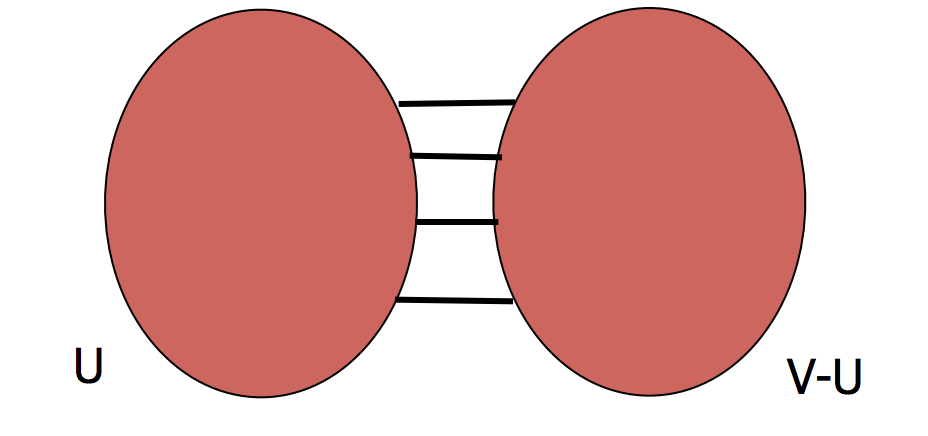

In [84]:
sl.hide_code_in_slideshow()
display(Image("figs/L23-min-cut.png", width=400))

In [6]:
cut_edges = nx.minimum_edge_cut(G)
cut_edges

[(11, 0)]

In [7]:
Gcopy = G.copy()
Gcopy.remove_edges_from(cut_edges)

In [8]:
cc = nx.connected_components(Gcopy)
node_set = {}
i = 1
for s in cc:
    for node in s:
        node_set[node] = i
    i+=1
node_set

{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 2,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1}

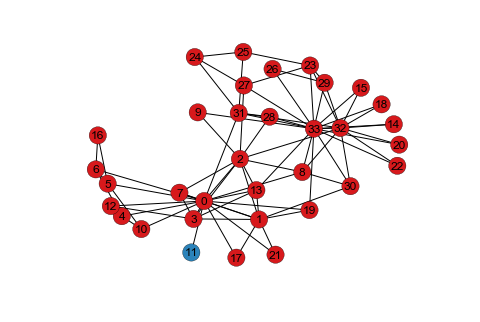

In [9]:
colors = ['#d7191c', '#2b83ba']
node_colors = [ colors[node_set[v]-1] for v in G.nodes()]
nx.draw(G, node_color=node_colors, with_labels='True')

### Graph spectral clustering

https://networkx.github.io/documentation/latest/reference/linalg.html

#### Exploring the Fiedler vector of the Karate-club graph

In [13]:
G=nx.karate_club_graph()
G = nx.Graph(G)

In [14]:
f = nx.fiedler_vector(G)
f

array([-0.11213743, -0.04128789,  0.02321895, -0.05549978, -0.28460453,
       -0.32372722, -0.32372722, -0.052586  ,  0.05160127,  0.09280088,
       -0.28460453, -0.21099295, -0.10946129, -0.01474197,  0.16275078,
        0.16275078, -0.42276533, -0.10018142,  0.16275078, -0.01363713,
        0.16275078, -0.10018142,  0.16275078,  0.15569457,  0.15302558,
        0.16096292,  0.18710959,  0.12766405,  0.0951523 ,  0.16765032,
        0.07349963,  0.09875343,  0.13034546,  0.11890326])

In [16]:
s = np.zeros(len(f))
s[f>0]=1
s = s.astype(int)
#s = s.tolist()
print(s, type(s))

[0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1] <class 'numpy.ndarray'>


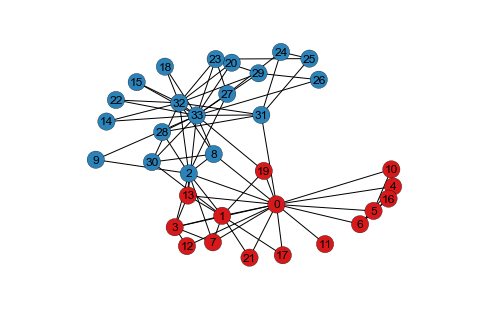

In [18]:
colors = ['#d7191c', '#2b83ba']
node_colors = [ colors[s[v]] for v in G.nodes()]
node_colors = ['#d7191c' if f[i] < 0 else '#2b83ba' for i, v in enumerate(G.nodes())]
nx.draw(G, node_color=node_colors, with_labels='True')

#### Exploring the Fiedler vector of a union of noisy cliques

In [19]:
from numpy.random import RandomState

def generate_noisy_subcliques(nodes_per_clique, inside_p, across_p, min_node_label=0, seed=None):
    """Generates a graph which consists of small cliques connected with each other.
    The noise within a clique and across cliques can be set by the `inside_p` and 
    `across_p` parameters respectively.
    
    
    Parameters
    ----------
    nodes_per_clique : list
        The size of this list corresponds to the number of cliques that will be
        generated. The value of each element will be the size of the corresponding 
        clique.
        
    inside_p : float
        The probability of an edge inside a clique. The higher this number, the more 
        each clique will resemble a fully connected graph.
        
    across_p : float
        The probability of an edge across cliques.
        
    min_node_label : int, default is 0
        The minimum node label of the graph.
        
    seed : int, default is None
        The seed to the pseudorandom number generator.
        
    
    Returns
    -------
    G : networkX graph
        The generated graph.
    """

    prng = RandomState(seed)
    clique_list = []
    number_of_cliques = len(nodes_per_clique)

    # Make the independent cliques
    starting_node = min_node_label
    for clique in range(number_of_cliques):
        G = nx.Graph()
        for u in range(starting_node, starting_node + nodes_per_clique[clique]):
            for v in range(u + 1, starting_node + nodes_per_clique[clique]):
                if prng.rand() < inside_p:
                    G.add_edge(u, v)
        clique_list.append(G)
        starting_node += nodes_per_clique[clique]

    # Combine them in one graph
    G = nx.Graph()
    for clique in range(number_of_cliques):
        G.add_edges_from(clique_list[clique].edges())

    # Connect edges across the cliques
    for i in range(number_of_cliques):
        clique_from = clique_list[i]
        for j in range(i + 1, number_of_cliques):
            clique_to = clique_list[j]
            for u in clique_from.nodes():
                for v in clique_to.nodes():
                    if prng.rand() < across_p:
                        G.add_edge(u, v)
    return G


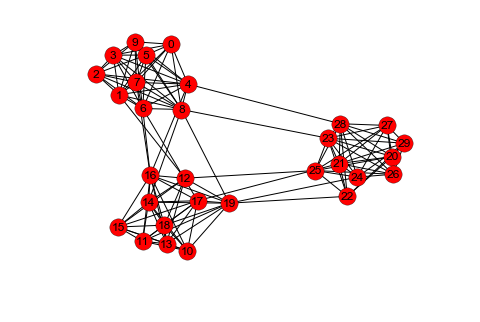

In [20]:
nodes_per_clique = [10, 10, 10]
across_p = 0.05
inside_p = 0.9
cliques = generate_noisy_subcliques(nodes_per_clique, inside_p, across_p)
nx.draw(cliques, with_labels=True)

In [21]:
f = nx.fiedler_vector(cliques)
f

array([-0.1875367 , -0.1748612 , -0.18753669, -0.18753669, -0.14289188,
       -0.18753669, -0.16891536, -0.17927918, -0.13240941, -0.18753669,
       -0.08621616, -0.08621616, -0.05752328, -0.0831166 , -0.08792234,
       -0.08950758, -0.10283882, -0.06261288, -0.0831166 , -0.03034586,
        0.27456363,  0.23858361,  0.23234726,  0.23135721,  0.2383654 ,
        0.23425848,  0.27529247,  0.27529247,  0.23033524,  0.27506101])

In [22]:
s = np.zeros(len(f))
s[f>0]=1
s = s.astype(int)
s = s.tolist()
print(s, type(s))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] <class 'list'>


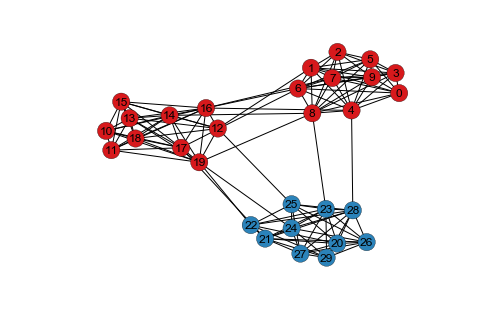

In [23]:
colors = ['#d7191c', '#2b83ba']
node_colors = [ colors[s[v]] for v in cliques.nodes()]
nx.draw(cliques, node_color=node_colors, with_labels='True')

#### Beyond the Fiedler vector

In [24]:
L = nx.laplacian_matrix(cliques).astype(float)
w,v = sp.sparse.linalg.eigsh(L, k = 3, which='SM')

In [25]:
print(w)
print(v)

[  1.03513360e-15   7.42928940e-01   1.35157655e+00]
[[ 0.18257419  0.18753669 -0.21598681]
 [ 0.18257419  0.1748612  -0.17448632]
 [ 0.18257419  0.18753669 -0.21598681]
 [ 0.18257419  0.18753669 -0.21598681]
 [ 0.18257419  0.14289188 -0.16679381]
 [ 0.18257419  0.18753669 -0.21598681]
 [ 0.18257419  0.16891536 -0.1398143 ]
 [ 0.18257419  0.17927918 -0.17640177]
 [ 0.18257419  0.13240941 -0.13051515]
 [ 0.18257419  0.18753669 -0.21598681]
 [ 0.18257419  0.08621616  0.29177205]
 [ 0.18257419  0.08621616  0.29177205]
 [ 0.18257419  0.05752328  0.18442754]
 [ 0.18257419  0.0831166   0.27936002]
 [ 0.18257419  0.08792234  0.23687896]
 [ 0.18257419  0.08950758  0.29220675]
 [ 0.18257419  0.10283882  0.16594639]
 [ 0.18257419  0.06261288  0.21319717]
 [ 0.18257419  0.0831166   0.27936002]
 [ 0.18257419  0.03034585  0.18110277]
 [ 0.18257419 -0.27456363 -0.06703564]
 [ 0.18257419 -0.23858361 -0.03476529]
 [ 0.18257419 -0.23234726 -0.02948148]
 [ 0.18257419 -0.23135721 -0.07033206]
 [ 0.182574

In [26]:
print (w.shape, v.shape)
X = v*w

(3,) (30, 3)


In [27]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
error = kmeans.inertia_

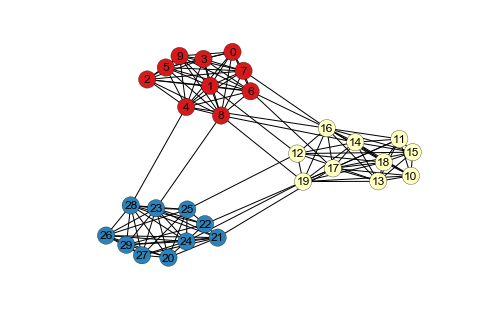

In [28]:
colors = ['#d7191c', '#ffffbf', '#2b83ba']
node_colors = [ colors[labels[v]] for v in cliques.nodes()]
nx.draw(cliques, node_color=node_colors, with_labels='True')

In [29]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int32)